In [32]:
import pandas as pd

train = pd.read_csv("E:\Datasets ML\home loan train.csv")
test = pd.read_csv("E:\Datasets ML\home loan test.csv")

print(train.head())
print(train.info())
print(test.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score




In [34]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
for col in cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))



In [35]:
train.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(test.median(numeric_only=True), inplace=True)

In [36]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

train['LoanAmount_log'] = np.log(train['LoanAmount']+1)
test['LoanAmount_log'] = np.log(test['LoanAmount']+1)

#

In [ ]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

In [38]:
X = train.drop(['Loan_ID','Loan_Status'], axis=1)
y = train['Loan_Status'].map({'Y':1,'N':0})

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



In [39]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



In [40]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)



In [41]:
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('gb', gb)],
    voting='soft'
)



In [42]:
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8536585365853658


In [43]:
pred = model.predict(test.drop('Loan_ID', axis=1))

output = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan_Status': ['Y' if x==1 else 'N' for x in pred]})
output.to_csv("submission.csv", index=False)
print(output.head())


    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


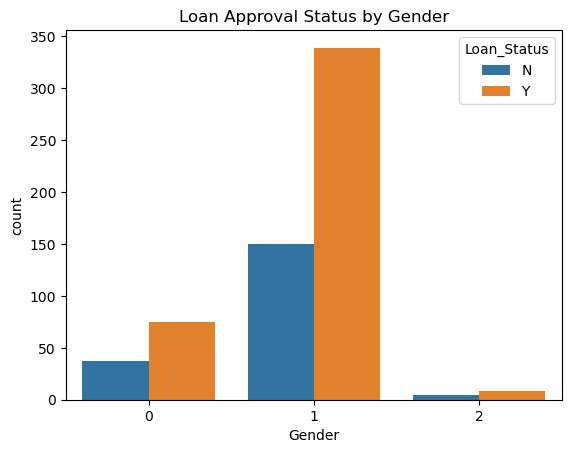

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.title("Loan Approval Status by Gender")
plt.show()


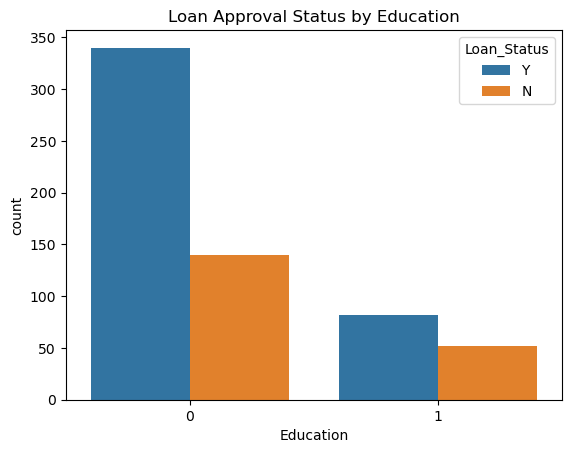

In [45]:
sns.countplot(x='Education', hue='Loan_Status', data=train)
plt.title("Loan Approval Status by Education")
plt.show()


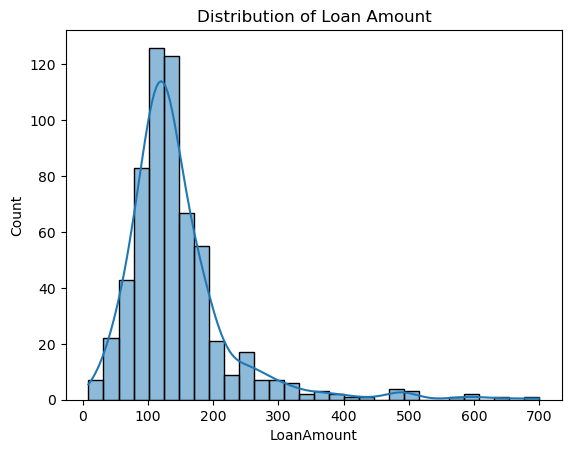

In [46]:
sns.histplot(train['LoanAmount'], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.show()


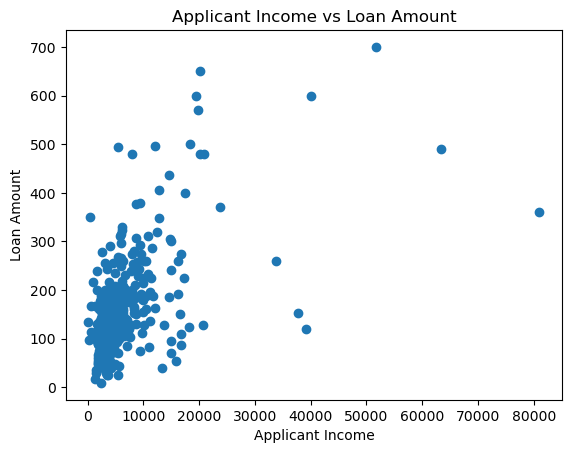

In [47]:
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Applicant Income vs Loan Amount")
plt.show()
    

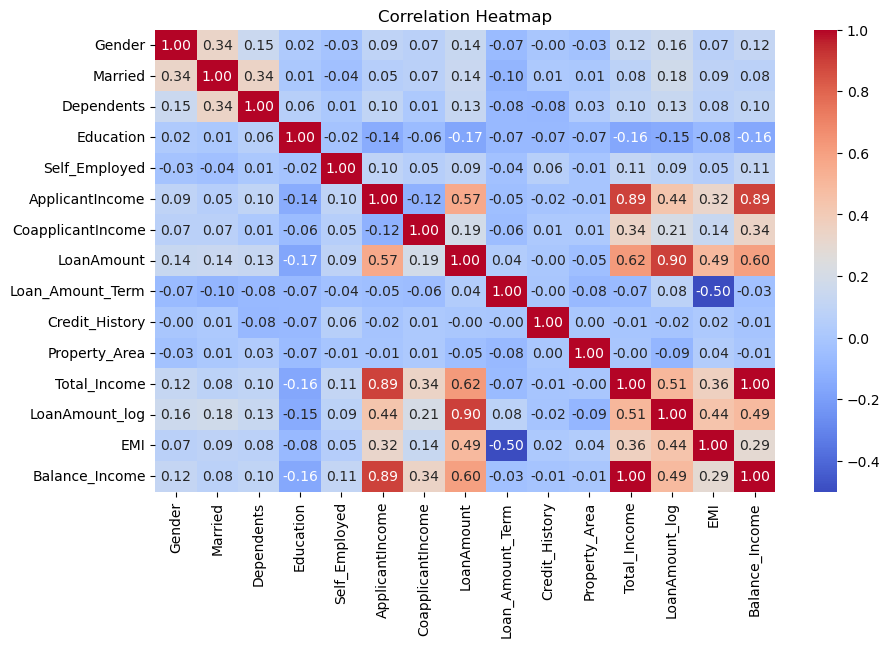

In [48]:
import numpy as np

corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
